# Demo de Transformers disponibles en HuggingFace para procesamiento de Imágenes

https://huggingface.co/models

In [1]:
#@title Controla que se ejecute con GPU
import torch

if torch.cuda.is_available():
  print("GPU encontrado.")
else:
  raise Exception("GPU no encontrado, se cancela la ejecución porque sino es muy lento!!!!")


GPU encontrado.


In [2]:
#@title Instalar paquete Transformers de HuggingFace
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 44.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 24.8 MB/s eta 0:00:00


In [3]:
#@title Instalar paquete Diffusers de HuggingFace

!pip install diffusers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.8/934.8 kB 15.8 MB/s eta 0:00:00


In [4]:
#@title Instalar otras librerías

!pip install fairseq

!pip install sentencepiece

!pip install accelerate


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 53.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.8/123.8 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.6/269.6 kB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.4/112.4 kB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fairseq: filename=fairseq-0.12.2-cp39-cp39-linux_x86_64.whl size=11180066 sha256=b189ed3606f7905997285b26d086366ced44fb65b6578e050c0dbdc3b134ed39
  Stored in directory: /root/.cache/pip/wheels/59/35/87/2baf2e4ad37c83fd698c486b3d39f0e7022226fa52ab469c31
  Crea

In [5]:
#@title Cargar Librerías

import torch  # nota: usa Torch porque con TF directo tira error

import transformers 

from diffusers import StableDiffusionPipeline
from diffusers import StableDiffusionImageVariationPipeline
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer
from torchvision import transforms
from fairseq import utils

#import IPython.display as ipd
from IPython.display import Audio, display
import textwrap

from PIL import Image
import requests # request img from web
import shutil # save img locally

print("Librerías cargadas.")

# determina si usa GPU o CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print("Device: ", device)


Librerías cargadas.
Device:  cuda:0


#Modelo Text-To-Image (TTI)

In [6]:
#@title Cargar Modelo TTI

TTI_model_id = "runwayml/stable-diffusion-v1-5"

TTI_pipe = StableDiffusionPipeline.from_pretrained(TTI_model_id) #, torch_dtype=torch.float16)
TTI_pipe = TTI_pipe.to("cuda")

def genImage(text):
  return TTI_pipe(text).images[0]

print("\nModelo ", TTI_model_id, " cargado.")

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.



Modelo  runwayml/stable-diffusion-v1-5  cargado.


  0%|          | 0/50 [00:00<?, ?it/s]



>  San Martín cabalgaba en su caballo blanco cuando ataco al enemigo.


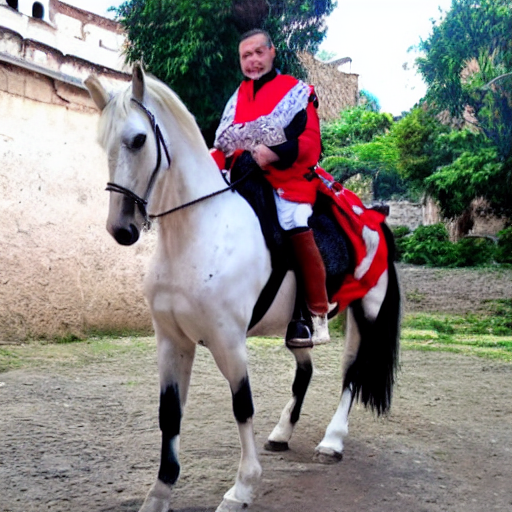

In [7]:
#@title Probar Modelo TTI 1

text_to_image = "San Martín cabalgaba en su caballo blanco cuando ataco al enemigo." #@param {type:"string"}

# ejecuta el modelo
img1 = genImage(text_to_image)

print("\n")
print("> ", textwrap.fill(text_to_image, 100))
display( img1 )  

  0%|          | 0/50 [00:00<?, ?it/s]



>  un atardecer sobre el mar, con una playa  paradisiaca con varias palmeras


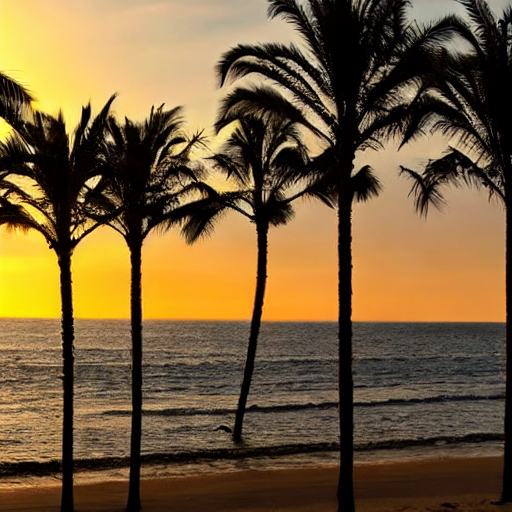

In [8]:
#@title Probar Modelo TTI 2

text_to_image = "un atardecer sobre el mar, con una playa  paradisiaca con varias palmeras" #@param {type:"string"}

# ejecuta el modelo
img2 = genImage(text_to_image)

print("\n")
print("> ", textwrap.fill(text_to_image, 100))
display( img2 )  

#Modelo Image-To-Image (ITI)

In [9]:
#@title Cargar Modelo ITI

ITI_model_name = "lambdalabs/sd-image-variations-diffusers"

ITI_sd_pipe = StableDiffusionImageVariationPipeline.from_pretrained(
  ITI_model_name,
  revision="v2.0",
  )
ITI_sd_pipe = ITI_sd_pipe.to(device)

# determina transformaciones para la imagen
ITI_tform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(
        (224, 224),
        interpolation=transforms.InterpolationMode.BICUBIC,
        antialias=False,
        ),
    transforms.Normalize(
      [0.48145466, 0.4578275, 0.40821073],
      [0.26862954, 0.26130258, 0.27577711]),
])

def gen_variations(im):
  # procesa imagen
  inp = ITI_tform(im).to(device).unsqueeze(0)
  # ajusta salida
  out = ITI_sd_pipe(inp, guidance_scale=3)
  return out["images"][0]
  
def descargar_imagen(imagen_URL):   
  if imagen_URL == "":
    return None
  # baja la imagen
  URL_file_name = "./donwload_image.jpg"
  res = requests.get(imagen_URL, stream = True)
  if res.status_code == 200:
      with open(URL_file_name,'wb') as f:
          shutil.copyfileobj(res.raw, f)
  else:
      print('No se puede desacargar la imagen')
      return None
  # abre la imagen bajada
  URL_imag = Image.open(URL_file_name)
  return URL_imag

print("\nModelo ", ITI_model_name, " cargado.")

Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.



Modelo  lambdalabs/sd-image-variations-diffusers  cargado.


> Imagen descargada: 


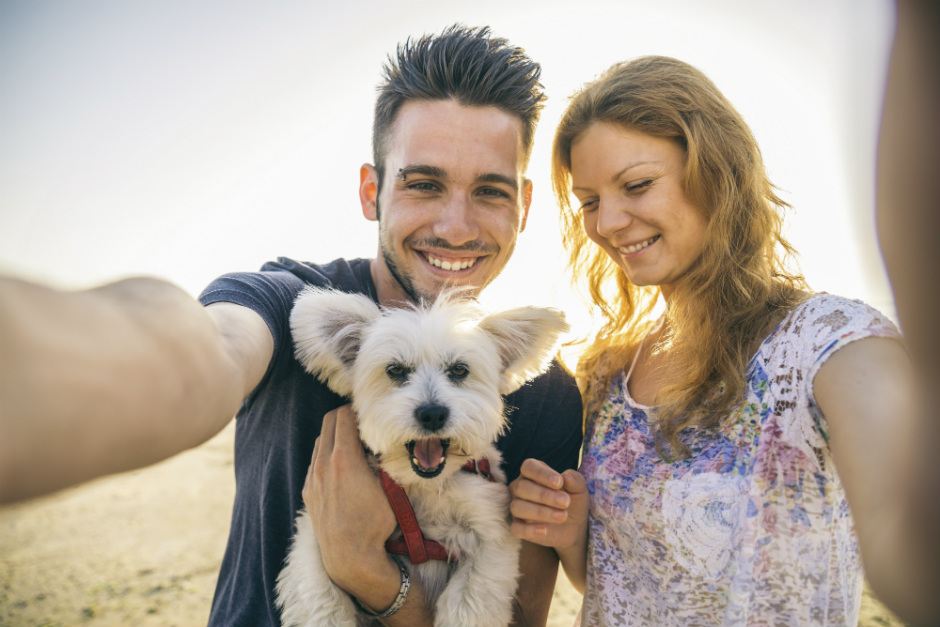



> Variación de la Imagen: 


  0%|          | 0/50 [00:00<?, ?it/s]

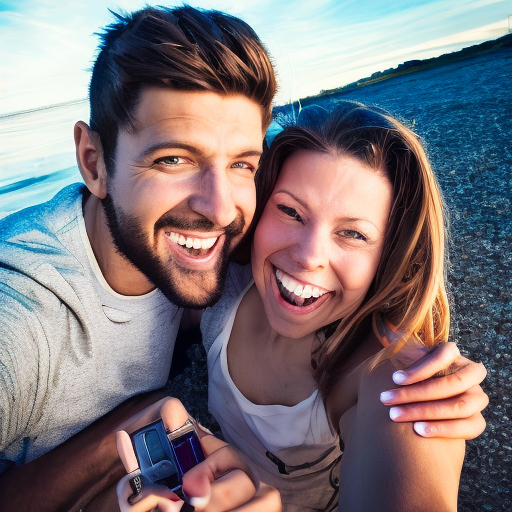

In [10]:
#@title Probar Modelo ITI 1

imagen_URL = "https://static.fundacion-affinity.org/cdn/farfuture/54n76QrL7YrsyLSTQlAzpJnwCz54nW1MsmYw2QJcIII/mtime:1528830295/sites/default/files/antrozoologia-conociendo-el-vinculo-entre-personas-y-otros-animales.jpg" #@param {type:"string"}

# descarga imagen base
URL_imag = descargar_imagen( imagen_URL )

if URL_imag is None:
    print("No se pudo descargar la imagen de ", URL_imag)
else:
    print("> Imagen descargada: ")
    display( URL_imag )

    # procesa laa imagen
    print("\n\n> Variación de la Imagen: ")
    varImg = gen_variations(URL_imag)
    display( varImg )

> Imagen descargada: 


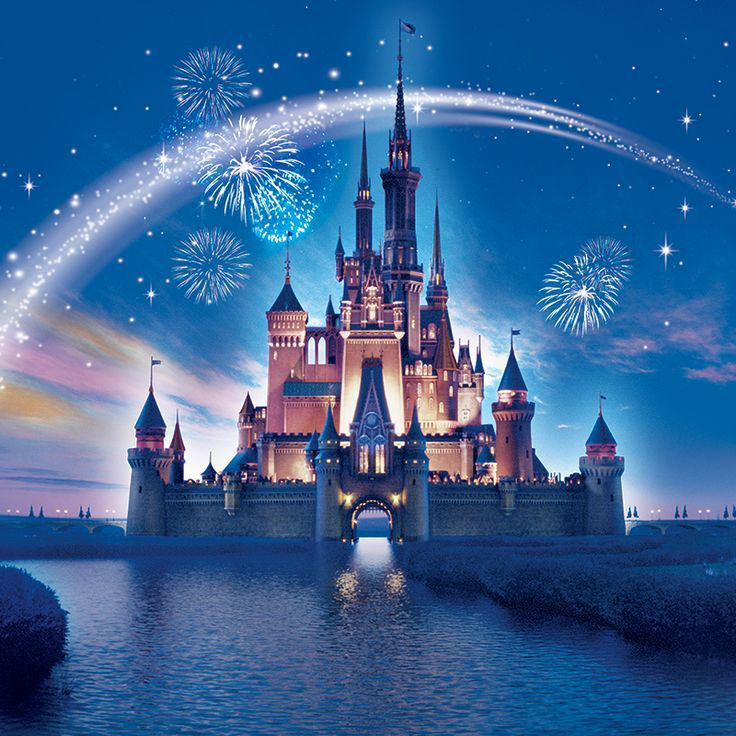



> Variación de la Imagen: 


  0%|          | 0/50 [00:00<?, ?it/s]

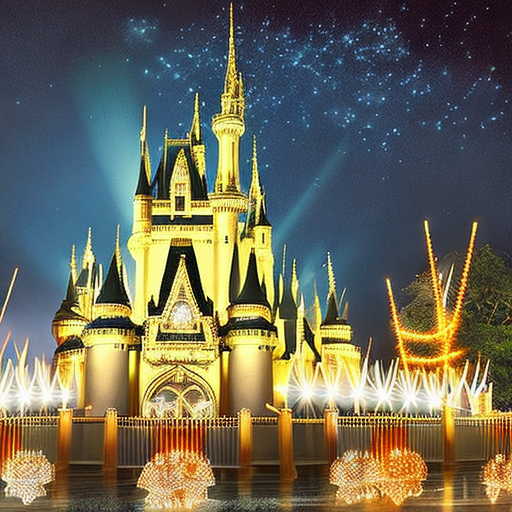

In [22]:
#@title Probar Modelo ITI 2

imagen_URL = "https://juanlive.com.co/wp-content/uploads/2476d01db0b5e0417259c81e61c71fcd.jpg" #@param {type:"string"}

# descarga imagen base
URL_imag = descargar_imagen( imagen_URL )

if URL_imag is None:
    print("No se pudo descargar la imagen de ", URL_imag)
else:
    print("> Imagen descargada: ")
    display( URL_imag )

    # procesa laa imagen
    print("\n\n> Variación de la Imagen: ")
    varImg = gen_variations(URL_imag)
    display( varImg )

#Modelo Image-To-Text (ITT)

In [17]:
#@title Cargar Modelo ITT

ITT_model_name = "nlpconnect/vit-gpt2-image-captioning"

ITT_model = VisionEncoderDecoderModel.from_pretrained(ITT_model_name)
ITT_feature_extractor = ViTImageProcessor.from_pretrained(ITT_model_name)
ITT_tokenizer = AutoTokenizer.from_pretrained(ITT_model_name)

ITT_model.to(device)

max_length = 16
num_beams = 4
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}


def gen_description(img):

  # prepara imagen
  images = []
  if img.mode != "RGB":
    img = img.convert(mode="RGB")
  images.append(img)

  pixel_values = ITT_feature_extractor(images=images, return_tensors="pt").pixel_values
  pixel_values = pixel_values.to(device)

  output_ids = ITT_model.generate(pixel_values, **gen_kwargs)

  preds = ITT_tokenizer.batch_decode(output_ids, skip_special_tokens=True)
  preds = [pred.strip() for pred in preds]
  return preds

print("\nModelo ", ITT_model_name, " cargado.")


Modelo  nlpconnect/vit-gpt2-image-captioning  cargado.


> Imagen descargada: 


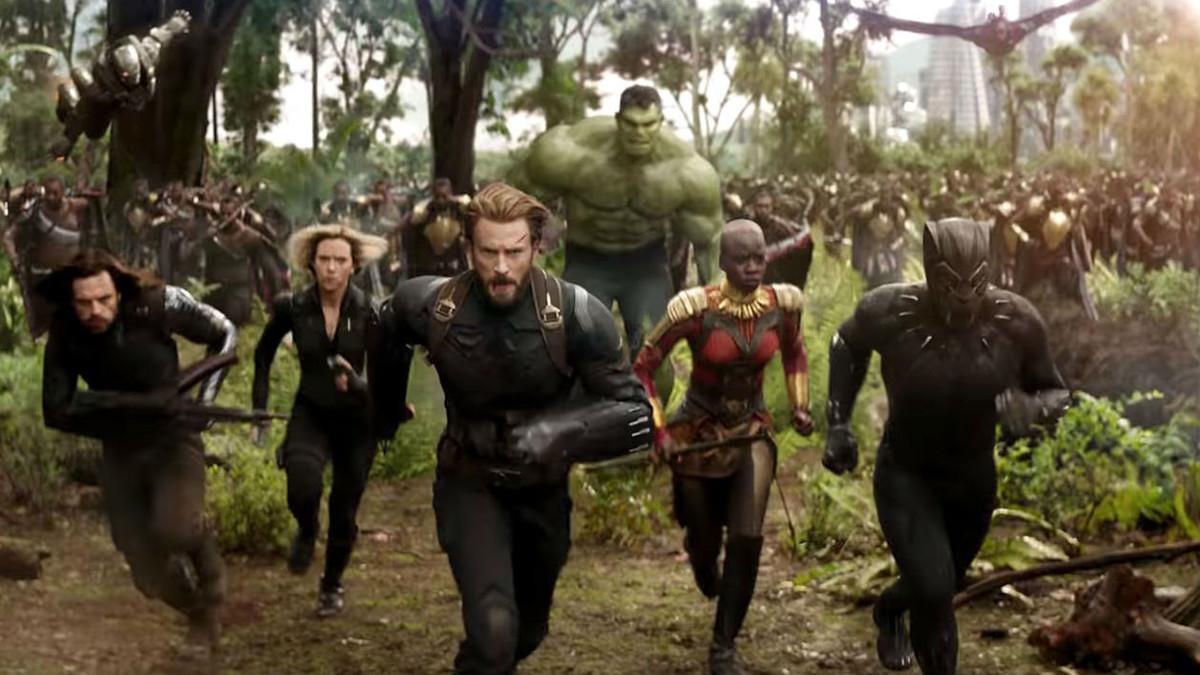

--> people dressed up in costumes and posing for a picture


In [18]:
#@title Probar Modelo ITT 1

imagen_URL = "https://estaticos-cdn.elperiodico.com/clip/2c7d8ead-5582-404c-be3e-2f04c60eb10b_alta-libre-aspect-ratio_default_0.jpg" #@param {type:"string"}

# descarga imagen base
URL_imag = descargar_imagen( imagen_URL )

if URL_imag is None:
    print("No se pudo descargar la imagen de ", URL_imag)
else:
    print("> Imagen descargada: ")
    display( URL_imag )

    # procesa la imagen
    descList = gen_description( URL_imag ) 
    for d in descList:
      print("-->", textwrap.fill(d, 100))
      

> Imagen descargada: 


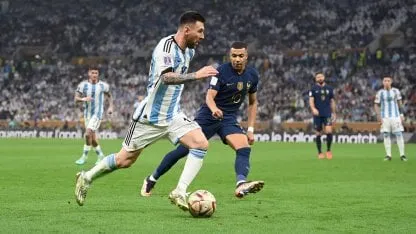

--> soccer players are playing soccer on a field


In [19]:
#@title Probar Modelo ITT 2

imagen_URL = "https://media.tycsports.com/files/2022/12/22/518560/messi-vs-mbappe-en-la-final-del-mundial-de-qatar-2022_416x234.webp?v=2" #@param {type:"string"}

# descarga imagen base
URL_imag = descargar_imagen( imagen_URL )

if URL_imag is None:
    print("No se pudo descargar la imagen de ", URL_imag)
else:
    print("> Imagen descargada: ")
    display( URL_imag )

    # procesa la imagen
    descList = gen_description( URL_imag ) 
    for d in descList:
      print("-->", textwrap.fill(d, 100))


# Probar Modelos combinados

  0%|          | 0/50 [00:00<?, ?it/s]



>  grupo de personas bailando en fiesta de casamiento


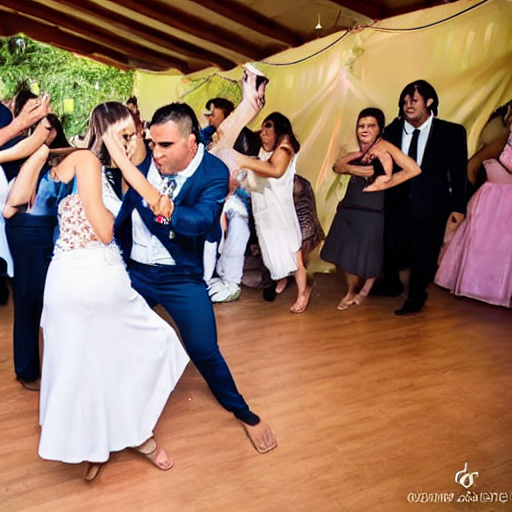

--> a bride and groom cutting their wedding cake


> Variación de la Imagen #1: 


  0%|          | 0/50 [00:00<?, ?it/s]

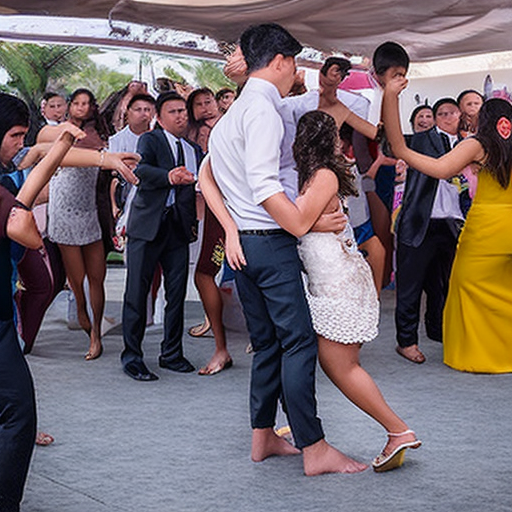

--> a man standing next to a woman on a sidewalk


> Variación de la Imagen #2: 


  0%|          | 0/50 [00:00<?, ?it/s]

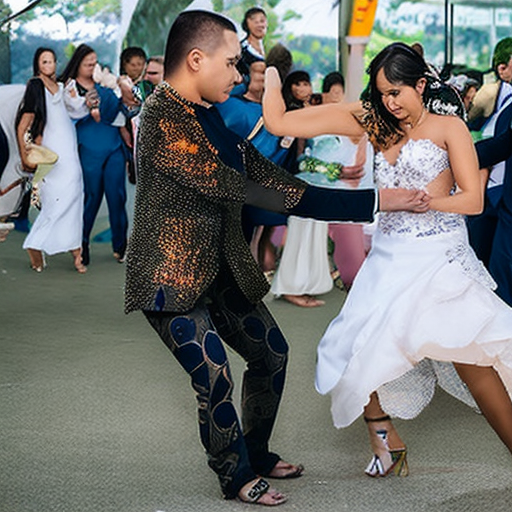

--> a man in a suit and tie standing next to a woman


> Variación de la Imagen #3: 


  0%|          | 0/50 [00:00<?, ?it/s]

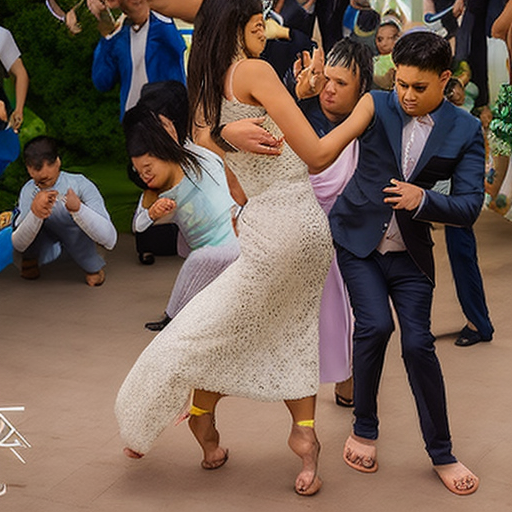

--> a young girl and a young boy in a crowd of people


In [21]:
#@title Probar Todos los Modelos 

texto = "grupo de personas bailando en fiesta de casamiento" #@param {type:"string"}
cant_variaciones = 3 #@param {type:"integer"}

if cant_variaciones < 1:
  cant_variaciones = 1

# ejecuta el modelo TTI
genImag = genImage(texto)

print("\n")
print("> ", textwrap.fill(texto, 100))
display( genImag )  

# procesa la imagen ITT
descList = gen_description( genImag ) 
for d in descList:
  print("-->", textwrap.fill(d, 100))

# genera variación de la imagen
for i in range(cant_variaciones):
    # procesa la imagen por modelo ITI
    print("\n\n> Variación de la Imagen #"+str(i+1)+": ")
    varImg = gen_variations(genImag)
    display( varImg )
  
    # procesa la imagen ITT
    descList = gen_description( varImg ) 
    for d in descList:
      print("-->", textwrap.fill(d, 100))
